content list: ['10', '1,1,0,1,2,5,7', '0,0,1,2,3,2,1', '1,1,0,1,2,5,7', '1,1,0,2,1,5,6', '1,1,2,2,3,3,4', '1,1,0,2,1,5,6', '0,0,0,6,7,1,2', '3,4,5,1,3,5,3', '1,1,2,2,3,3,4', '1,1,3,2,3,3,3']
----------------------------------------
file list: [[10], [1, 1, 0, 1, 2, 5, 7], [0, 0, 1, 2, 3, 2, 1], [1, 1, 0, 1, 2, 5, 7], [1, 1, 0, 2, 1, 5, 6], [1, 1, 2, 2, 3, 3, 4], [1, 1, 0, 2, 1, 5, 6], [0, 0, 0, 6, 7, 1, 2], [3, 4, 5, 1, 3, 5, 3], [1, 1, 2, 2, 3, 3, 4], [1, 1, 3, 2, 3, 3, 3]]
----------------------------------------
[17, 9, 17, 16, 16, 16, 16, 24, 16, 16]
1--3
3--1
4--6
5--9
6--4
9--5
[' ', 3, ' ', 1, 6, 9, 4, ' ', ' ', 5, ' ']
----------------------------------------
[' ', '3', ' ', '1', '6', '9', '4', ' ', ' ', '5', ' ']
+----+---------------+-----+---------------+
| SN |    Features   | Sum | Similarity ID |
+----+---------------+-----+---------------+
| 0  |       10      |     |               |
| 1  | 1,1,0,1,2,5,7 |  17 |       3       |
| 2  | 0,0,1,2,3,2,1 |  9  |               

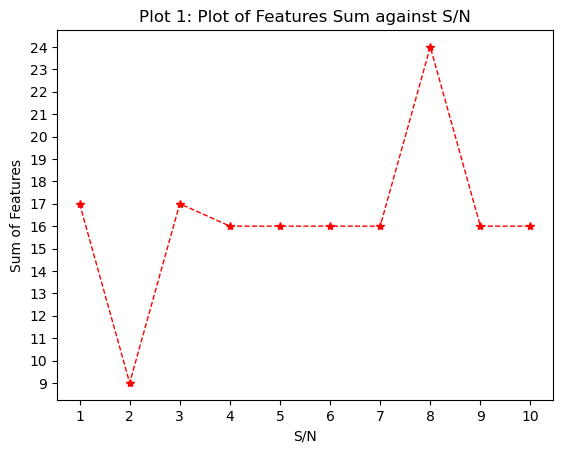

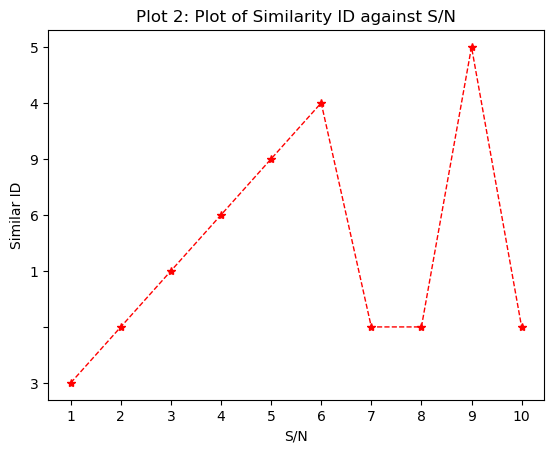

In [183]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

import copy

# open the file
with open("terrorist.in") as f:
    content_list = f.readlines()

#strip the newline characters
content_list = [x.strip() for x in content_list]

# create arrays to store data
file_list = []
sum_list = []
index_list = []


print(f"content list: {content_list}")
print("----------------------------------------")



for item in content_list:
#     convert each row of file to a list of integers and append to the file_list list
    
    l = item.split(",")

    k = list(map(int,l))
    file_list.append(k)
    

print(f"file list: {file_list}")
print("----------------------------------------")



# get the sum of each list in the file_list array
for i in range(1,len(file_list)):
    # print(sum(sorted_list[i]))
    sum_list.append(sum(file_list[i]))
    index_list.append(i)


print(sum_list)


# list to store the similarity id of each feature and initialize to a list of emppty strings
similarID_list = [" "] * len(file_list);


for i in range (0,  len(file_list)):
    for j in range(0, len(file_list)):
        # print(f"{all_list[i]} ---- {all_list[j]}")
        if(file_list[i] == file_list[j] and i != j ):
            print(f"{i}--{j}")
            similarID_list[i] = j

print(similarID_list)
print("----------------------------------------")



# string to hold the string version of the values in similarID_list
string_similarID_list = [str(x) for x in similarID_list]
print(string_similarID_list)



# use pretty table to present all the results in tabular format
myTable = PrettyTable()
myTable.add_column("SN", [0] + index_list)
myTable.add_column("Features", content_list)
myTable.add_column("Sum", [" "] + sum_list)
myTable.add_column("Similarity ID", similarID_list)


print(myTable)

# use matplotlib to present the result in graph format
plt.plot(index_list,sum_list,c='r',ls="--",lw="1",marker= '*')
plt.xticks(np.arange(1,len(index_list) + 1,1))
plt.yticks(np.arange(min(sum_list),max(sum_list) + 1,1))
plt.xlabel("S/N")
plt.ylabel("Sum of Features")
plt.title("Plot 1: Plot of Features Sum against S/N")
plt.show()


plt.plot(index_list,string_similarID_list[1: ],c='r',ls="--",lw="1",marker= '*')
plt.xticks(np.arange(1,len(index_list) + 1,1))
plt.xlabel("S/N")
plt.ylabel("Similar ID")
plt.title("Plot 2: Plot of Similarity ID against S/N")
plt.show()